# HW1
By Xiangyu Ma

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1

#### 1. Download and combine data about 3 types of 311 requests (graffiti, alley lights out and vacant/abandoned buildings)

In [208]:
pd.options.display.max_columns = None

In [39]:
graf = pd.read_csv("data/311_Service_Requests_-_Graffiti_Removal.csv")

In [220]:
alley = pd.read_csv("data/311_Service_Requests_-_Alley_Lights_Out.csv")

In [226]:
vacant = pd.read_csv("data/311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv")

In [287]:
graf.head(1)

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,SSA,Latitude,Longitude,Location
0,01/01/2011,Completed - Dup,01/03/2011,11-00002268,Graffiti Removal,Brick - Unpainted,Front,3701 S WOLCOTT AVE,60609.0,1.164295e+06,1.880150e+06,11.0,9.0,59.0,NaN,41.82668,-87.672589,"(41.82667996575031, -87.67258908007462)"


In [288]:
alley.head(1)

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,Latitude,Longitude,Location
0,01/01/2011,Completed - Dup,01/02/2011,11-00001814,Alley Light Out,4316 S SACRAMENTO AVE,60632.0,1.157078e+06,1.875878e+06,14.0,9.0,58.0,41.815176,-87.699332,"(41.81517646745516, -87.69933194705028)"


In [289]:
vacant.head(1)

,Type of Service Request,Service Request Number,Creation Date,"LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).",IS THE BUILDING DANGEROUS OR HAZARDOUS?,IS BUILDING OPEN OR BOARDED?,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,IS THE BUILDING VACANT DUE TO FIRE?,"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",ADDRESS STREET NUMBER,ADDRESS STREET DIRECTION,ADDRESS STREET NAME,ADDRESS STREET SUFFIX,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,LATITUDE,LONGITUDE,Location
0,Vacant/Abandoned Building,08-00109075,01/18/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7905.0,W,ADDISON,ST,60613.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
vacant = vacant.rename(columns = {"SERVICE REQUEST TYPE": "Type of Service Request",
                        "SERVICE REQUEST NUMBER": "Service Request Number",
                        "DATE SERVICE REQUEST WAS RECEIVED": "Creation Date",
                        "ZIP CODE": "ZIP Code",
                        "X COORDINATE": "X Coordinate",
                        "Y COORDINATE": "Y Coordinate"
                        })

In [230]:
combDF = pd.concat([graf, vacant, alley])

In [239]:
finalDF = combDF.loc[:,["Type of Service Request", "Status", "Creation Date", "Completion Date", "Police District", "Ward", "ZIP Code"]].reset_index()

In [244]:
finalDF.head()

,index,Type of Service Request,Status,Creation Date,Completion Date,Police District,Ward,ZIP Code
0,0,Graffiti Removal,Completed - Dup,01/01/2011,01/03/2011,9.0,11.0,60609.0
1,1,Graffiti Removal,Completed - Dup,01/01/2011,01/03/2011,25.0,30.0,60639.0
2,2,Graffiti Removal,Completed - Dup,01/01/2011,01/03/2011,23.0,46.0,60613.0
3,3,Graffiti Removal,Completed - Dup,01/01/2011,01/03/2011,19.0,32.0,60618.0
4,4,Graffiti Removal,Completed - Dup,01/01/2011,01/04/2011,16.0,38.0,60630.0


#### 2. Generate Summary Statistics
*"Generate summary statistics for these requests including but not limited to number of requests of each type (and subtype within each of the types above) over time, by neighborhood, response time by the city. Please use a combination of tables and graphs to present these summary stats."*

First, I'll examine the dataset on graffiti removal. Upon examination and a couple of hours of waiting around, I've come to realize that this data set is way too big for my puny little MacBook to handle. So I'll look at a subset of it: dumpster graffiti.

In [62]:
dumpster_graf = graf.loc[graf.iloc[:,6] =="Dumpster",:].reset_index()

In [63]:
len(dumpster_graf)

18666

In [27]:
# I need to create a new variable that represents response time.

In [64]:
from dateutil import parser

In [65]:
dumpster_graf['createtime'] = np.NaN
dumpster_graf['finishtime'] = np.NaN
dumpster_graf['total_time'] = np.NaN

In [91]:
for i in range (0, len(dumpster_graf)):
    
    dumpster_graf.loc[i, 'createtime'] = parser.parse(dumpster_graf.loc[i, 'Creation Date'])
    
    if dumpster_graf.loc[i,'Status']=="Completed":
        dumpster_graf.loc[i, 'finishtime'] = parser.parse(dumpster_graf.loc[i, 'Completion Date'])
        dumpster_graf.loc[i,'total_time'] = (dumpster_graf.loc[i, 'finishtime'] - dumpster_graf.loc[i, 'createtime']).days
    if (i >= 1000 and i%1000 == 0):
        print(str(i) + " rows have completed.")

1000 rows have completed.
2000 rows have completed.
3000 rows have completed.
4000 rows have completed.
5000 rows have completed.
6000 rows have completed.
7000 rows have completed.
8000 rows have completed.
9000 rows have completed.
10000 rows have completed.
11000 rows have completed.
12000 rows have completed.
13000 rows have completed.
14000 rows have completed.
15000 rows have completed.
16000 rows have completed.
17000 rows have completed.
18000 rows have completed.


In [92]:
# create a csv
dumpster_graf.to_csv("dumpster_graf.csv")

Where are all these incidents happening? Below, I'll examine the reported incidents as they occur across ZIP codes.

The following table shows the 10 ZIP codes with the most number of reported incidents

In [283]:
finalDF['ZIP Code'].value_counts().head(10)

60632.0    114662
60608.0     89438
60647.0     82823
60618.0     77872
60629.0     69080
60623.0     64895
60609.0     53517
60639.0     49662
60622.0     45434
60625.0     44815
Name: ZIP Code, dtype: int64

Let's examine more closely at the zipcode with the most incidents, 606032.

In [285]:
finalDF.loc[finalDF["ZIP Code"] == 60632, "Type of Service Request"].value_counts()

Graffiti Removal             106305
Alley Light Out                7176
Vacant/Abandoned Building      1181
Name: Type of Service Request, dtype: int64

Now, let's look at variation across time. I'll look first at the creation date of the requests. I realized I had to take a small 2.5% sample to avoid my macbook going screeching to a halt, so let me do that.

In [308]:
# take a 2.5% probability sample
sampleDF = finalDF.sample(frac=0.025, replace= False).reset_index()

In [309]:
sampleDF["createime"] = np.NaN
sampleDF["finishtime"] = np.NaN
sampleDF["total_time"] = np.NaN
for i in range(0, len(sampleDF)):
    sampleDF.loc[i, 'createtime'] = parser.parse(sampleDF.loc[i, 'Creation Date'])
    if (sampleDF.loc[i,'Status']=="Completed" or sampleDF.loc[i,'Status']=="Completed - Dup"):
        sampleDF.loc[i, 'finishtime'] = parser.parse(sampleDF.loc[i, 'Completion Date'])
        sampleDF.loc[i,'total_time'] = (sampleDF.loc[i, 'finishtime'] - sampleDF.loc[i, 'createtime']).days
    if (i >= 1000 and i%1000 == 0):
        print(str(i) + " rows have completed.")

1000 rows have completed.
2000 rows have completed.
3000 rows have completed.
4000 rows have completed.
5000 rows have completed.
6000 rows have completed.
7000 rows have completed.
8000 rows have completed.
9000 rows have completed.
10000 rows have completed.
11000 rows have completed.
12000 rows have completed.
13000 rows have completed.
14000 rows have completed.
15000 rows have completed.
16000 rows have completed.
17000 rows have completed.
18000 rows have completed.
19000 rows have completed.
20000 rows have completed.
21000 rows have completed.
22000 rows have completed.
23000 rows have completed.
24000 rows have completed.
25000 rows have completed.
26000 rows have completed.
27000 rows have completed.
28000 rows have completed.
29000 rows have completed.
30000 rows have completed.


In [310]:
sampleDF.to_csv("sampleDF.csv")

In [414]:
sampleDF['year'] = sampleDF["createtime"].apply(lambda x: x.year)

In [415]:
tsDF = sampleDF.loc[:,"year"].value_counts().sort_index()

In [416]:
# remove the three strange outliers
tsDF2 = tsDF.iloc[3:,]

This is is the time-series graph of all incidents from 2009 onwards.

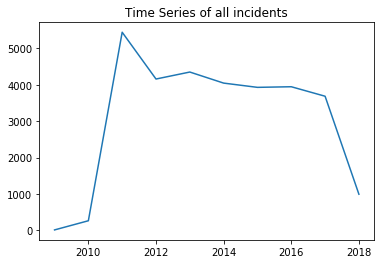

In [421]:
tsDF2.plot()
plt.title('Time Series of all incidents')
plt.show()

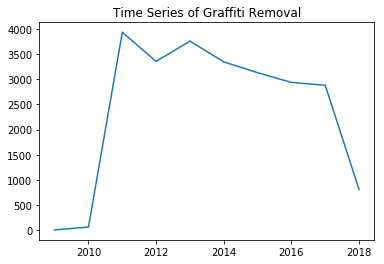

In [430]:
grafTS = sampleDF.loc[sampleDF["Type of Service Request"]=="Graffiti Removal","year"].value_counts().sort_index().iloc[3:,]
grafTS.plot()
plt.title('Time Series of Graffiti Removal')
plt.show()

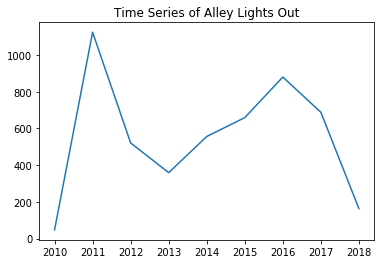

In [427]:
alleyTS = sampleDF.loc[sampleDF["Type of Service Request"]=="Alley Light Out","year"].value_counts().sort_index()
alleyTS.plot()
plt.title('Time Series of Alley Lights Out')
plt.show()

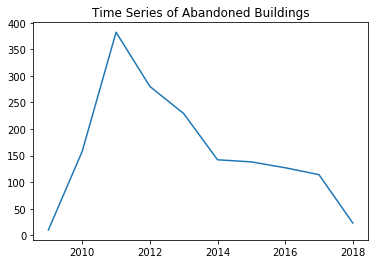

In [429]:
abanTS = sampleDF.loc[sampleDF["Type of Service Request"]=="Vacant/Abandoned Building","year"].value_counts().sort_index()
alleyTS.plot()
plt.title('Time Series of Abandoned Buildings')
plt.show()

Now let's look at some trends by ZIP code.

In [433]:
sampleDF['ZIP Code'].nunique()

60

There are 60 ZIP codes in my sample. I'll rank the ZIP codes by total no. of incidents, and then examine the ZIP code with the most incidents (60632), and the one with the median amount of incidents (60645)

In [448]:
mostDF = sampleDF.loc[sampleDF['ZIP Code'] == 60632]
mostDF["Type of Service Request"].value_counts()

Graffiti Removal             2714
Alley Light Out               199
Vacant/Abandoned Building      34
Name: Type of Service Request, dtype: int64

In [452]:
medianDF = sampleDF.loc[sampleDF['ZIP Code'] == 60645]
medianDF["Type of Service Request"].value_counts()

Graffiti Removal             214
Alley Light Out               45
Vacant/Abandoned Building      1
Name: Type of Service Request, dtype: int64

It seems that graffiti is the main driver of the difference in incidence reports between the two ZIP codes.

#### 3. Five interesting things I learned from the 311 data.

Now, to present some interesting preliminary findings:
1. It appears that the vast majority (76.7%) of graffiti reports are dealt with on the day of the report.
2. There does not appear to be a clear trend in the time-series graph of overall incidents.
3. There does not appear to be a clear trend in the time-series graphs of graffiti and alley lights out either.
4. There seems to be a decrease in reports of abandoned buildings across time.
5. Graffiti may be the main source of difference in reports across ZIP codes.

In [167]:
14313/len(dumpster_graf)*100

76.67952426872388

In [174]:
df1 = pd.DataFrame(dumpster_graf.loc[:,'total_time'].value_counts())
df2 = df1.reset_index().sort_values("index").iloc[:30,:]

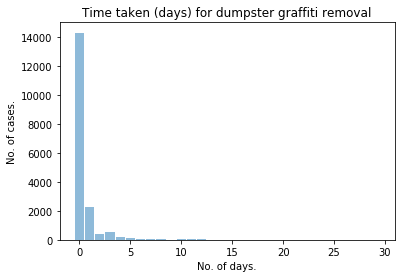

In [178]:
plt.bar(df2['index'], df2['total_time'], width = 0.9, align='edge', alpha=0.5, )
plt.title('Time taken (days) for dumpster graffiti removal')
plt.xlabel("No. of days.")
plt.ylabel("No. of cases.")
plt.show()

### Part II

This is my first time working with the US Census, so I'm learning a lot as I go along. It's my first encounter with the American Community Survey. I'm quite struck: it's a truly remarkable project. In the US Census' own words, "While the main function of the decennial census is to provide counts of people for the purpose of congressional apportionment and legislative redistricting, the primary purpose of the ACS is to measure the changing social and economic characteristics of the U.S. population." 

Looking at the ACS data, I'm struck first by the many types there are. There's 1-year data, 3-year data, and 5-year data: I found a [helpful guide on the census website](https://www.census.gov/programs-surveys/acs/guidance/estimates.html) that provides information on the differences between the three and when to use each. The main take-away is that there's a tradeoff between accurate/precision/granurarity of the data and the timeliness of the data.

But more choices await. Say I choose to use ACS 5-year data (2011-2015). I'm confronted next with a choice of four tables:
* Detail tables
* Subject tables
* Data profiles
* Comparison profiles

What, again, are the differences? It seems like they just *are*. They contain different types of information about the population.

This is also my first time writing API queries. This took me an embarrassing amount of time to get working.


In [543]:
api_keyxy = '9d2dc927b08baaf664a88ce2c21e23b3acaa7d1d'
base_url_acs_5y_2015 = 'https://api.census.gov/data/2015/acs/acs5?get='
race = 'B02001_002E'
snap = 'B22003_001E'
male = "B01001_002E"
children= 'B23007_001E'
total_pop = 'B01001_001E'
predicate = "&for=zip%20code%20tabulation%20area:*"
predkey = "&key=9d2dc927b08baaf664a88ce2c21e23b3acaa7d1d"
first_try = base_url + total_pop + ',' + race + ',' + snap + "," + male + "," + children + predicate + predkey

In [547]:
censusDF = pd.read_json(first_try)
censusDF.to_csv("census.csv")

In [609]:
censusDF = pd.read_csv("census.csv")
censusDF.columns = censusDF.iloc[0]
censusDF = censusDF.iloc[1:,:]

In [610]:
# convert str columns to numeric; also, rename columns
listnames = ["total_pop", "white", "snap", "male", "children", "ZIP Code"]
for i in range(2,8):
    j = i -2
    censusDF[listnames[j]] = pd.to_numeric(censusDF.iloc[:,i])
    print(listnames[j] + " completed.")

total_pop completed.
white completed.
snap completed.
male completed.
children completed.
ZIP Code completed.


In [611]:
rdycensusDF = censusDF.iloc[7:,:]

In [612]:
# convert cols to express %
listnames2 = ["white", "snap", "male", "children"]
for i in range(9,13):
    j = i - 9
    rdycensusDF[listnames2[j]+"%"] = rdycensusDF.iloc[:,i]/rdycensusDF['total_pop']
    print(listnames[j] + " completed.")

/Users/xiangyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


total_pop completed.
white completed.
snap completed.
male completed.


In [615]:
rdycensusDF.head(1)

,0,NAME,B01001_001E,B02001_002E,B22003_001E,B01001_002E,B23007_001E,zip code tabulation area,total_pop,white,snap,male,children,ZIP Code,white%,snap%,male%,children%
8,8,ZCTA5 00617,24793,23276,8352,11833,6173,00617,24793,23276,8352,11833,6173,617,0.938813,0.336869,0.477272,0.248982


In [621]:
finalcensus = rdycensusDF.iloc[:,[7,8,13,14,15,16,17]]

In [622]:
mergedDF = pd.merge(sampleDF,finalcensus, how = 'left', on = "ZIP Code")

In [623]:
mergedDF.head()

,level_0,index,Type of Service Request,Status,Creation Date,Completion Date,Police District,Ward,ZIP Code,cyear,createtime,createime,finishtime,total_time,year,zip code tabulation area,total_pop,white%,snap%,male%,children%
0,171019,171019,Graffiti Removal,Completed,06/06/2011,06/27/2011,19.0,47.0,60618,NaN,2011-06-06,NaN,2011-06-27 00:00:00,21.0,2011,60618,97324.0,0.805290,0.364042,0.502867,0.216175
1,238387,238387,Graffiti Removal,Completed,08/29/2011,08/29/2011,14.0,1.0,60647,NaN,2011-08-29,NaN,2011-08-29 00:00:00,0.0,2011,60647,88269.0,0.763722,0.383645,0.507698,0.193284
2,300428,300428,Graffiti Removal,Completed,11/21/2011,11/21/2011,10.0,22.0,60623,NaN,2011-11-21,NaN,2011-11-21 00:00:00,0.0,2011,60623,88635.0,0.468325,0.281255,0.492018,0.212850
3,1104655,70486,Alley Light Out,Completed - Dup,12/29/2011,01/05/2012,6.0,6.0,60619,NaN,2011-12-29,NaN,2012-01-05 00:00:00,7.0,2011,60619,63411.0,0.012033,0.405229,0.437132,0.222580
4,24018,24018,Graffiti Removal,Completed,01/21/2013,01/28/2013,4.0,10.0,60617,NaN,2013-01-21,NaN,2013-01-28 00:00:00,7.0,2013,60617,82213.0,0.362437,0.336930,0.458492,0.230341


What types of blocks get alley lights out reports? 

In [660]:
lightsoutDF = mergedDF.loc[mergedDF["Type of Service Request"] == "Alley Light Out",:]
tempDF = lightsoutDF["zip code tabulation area"].value_counts().reset_index().rename(columns = {"zip code tabulation area": "count", "index" : "ZIP"})
tempDF["ZIP Code"] = pd.to_numeric(tempDF["ZIP"])
lightsDF = pd.merge(tempDF, finalcensus, how = 'left', on = "ZIP Code")

In [671]:
lightsDF.head(10)

,ZIP,count,ZIP Code,zip code tabulation area,total_pop,white%,snap%,male%,children%
0,60628,323,60628,60628,67914,0.040110,0.342610,0.438260,0.223106
1,60629,317,60629,60629,114982,0.351107,0.268216,0.491051,0.205145
2,60617,268,60617,60617,82213,0.362437,0.336930,0.458492,0.230341
3,60620,241,60620,60620,69909,0.015649,0.364088,0.434522,0.230714
4,60619,231,60619,60619,63411,0.012033,0.405229,0.437132,0.222580
5,60638,228,60638,60638,57958,0.740243,0.342524,0.483488,0.245178
6,60632,199,60632,60632,91310,0.550378,0.264265,0.507579,0.211532
7,60643,187,60643,60643,50992,0.226310,0.349957,0.456130,0.240038
8,60634,182,60634,60634,74093,0.782584,0.343663,0.489992,0.238794
9,60651,171,60651,60651,61287,0.129897,0.311926,0.472482,0.219051


It seems that many of them have high % of white people in their population. The SNAP eligible % seems a little too high — I might have screwed up there.

What types of blocks get vacant building reports? 

In [674]:
vacDF = mergedDF.loc[mergedDF["Type of Service Request"] == "Vacant/Abandoned Building",:]
tempDF = vacDF["zip code tabulation area"].value_counts().reset_index().rename(columns = {"zip code tabulation area": "count", "index" : "ZIP"})
tempDF["ZIP Code"] = pd.to_numeric(tempDF["ZIP"])
vacantDF = pd.merge(tempDF, finalcensus, how = 'left', on = "ZIP Code")

In [675]:
vacantDF.head(10)

,ZIP,count,ZIP Code,zip code tabulation area,total_pop,white%,snap%,male%,children%
0,60636,182,60636,60636,37278,0.019127,0.303208,0.474784,0.205322
1,60628,166,60628,60628,67914,0.040110,0.342610,0.438260,0.223106
2,60621,118,60621,60621,31881,0.015025,0.345472,0.445500,0.203507
3,60617,103,60617,60617,82213,0.362437,0.336930,0.458492,0.230341
4,60620,103,60620,60620,69909,0.015649,0.364088,0.434522,0.230714
5,60619,95,60619,60619,63411,0.012033,0.405229,0.437132,0.222580
6,60624,92,60624,60624,38140,0.027216,0.311038,0.472916,0.203985
7,60609,80,60609,60609,62010,0.483212,0.310982,0.491034,0.213820
8,60623,63,60623,60623,88635,0.468325,0.281255,0.492018,0.212850
9,60651,59,60651,60651,61287,0.129897,0.311926,0.472482,0.219051


The trend of these zip codes being minority heavy is even more true now. They also seem to have fewer families with children, and higher SNAP rates, compared to the ZIP codes that are high in no. of alley lights out..

### Part III

#### A.

Google maps tells me that 3600 W Roosevelt Ave is in ZIP Code 60624.

In [684]:
sampleDF.loc[sampleDF["ZIP Code"] == 60624,:]["Type of Service Request"].value_counts()

Vacant/Abandoned Building    92
Alley Light Out              78
Graffiti Removal             67
Name: Type of Service Request, dtype: int64

It's most likely to be a vacant/abandoned building request.

In [700]:
tempsum = 92+78+67
print(92/tempsum*100)
print(78/tempsum*100)
print(67/tempsum*100)

38.81856540084388
32.91139240506329
28.270042194092827


38.8% it's a vacant/abandoned building, 32.9% it's an alley light out, 28% it's a graffiti removal.

#### B.

Garfield Park is also in ZIP code 60624 while Uptown is in Zipcode 60640.

In [689]:
sampleDF.loc[sampleDF["ZIP Code"] == 60640,:]["Type of Service Request"].value_counts()

Graffiti Removal             488
Alley Light Out               47
Vacant/Abandoned Building      3
Name: Type of Service Request, dtype: int64

In [701]:
tempsum2 = 488+47+3
print(488/tempsum2*100)
print(47/tempsum2*100)
print(3/tempsum2*100)

90.70631970260223
8.736059479553903
0.5576208178438662


Using Bayes' law:

P(Garfield Park | Graffiti) = P(Graffiti|G Park) * P(Graffiti) / P(Garfield Park)

P(Uptown| Graffiti) = P(Graffiti|Uptown ) * P(Graffiti) / P(Uptown)

In [705]:
puptown = tempsum2/(tempsum+tempsum2)
pgpark = tempsum/(tempsum+tempsum2)
pgraf = (488+67)/(tempsum+tempsum2)

In [706]:
print("P(Garfield Park | Graffiti): {}".format(67/tempsum*pgraf/pgpark))
print("P(Uptown| Graffiti: {}".format(488/tempsum2*pgraf/puptown))

P(Garfield Park | Graffiti): 0.6620199754312878
P(Uptown| Graffiti: 0.9357250452591866


In [714]:
0.9357250452591866/0.6620199754312878

1.413439291842497

It's more 1.41 more likely to be from Uptown Park.

#### C.

In [710]:
pgp = 600/1000
pup = 400/1000
pgraf2 = 260/1000
condGP = 100/600
condUP = 160/400

In [712]:
print("P(Garfield Park | Graffiti): {}".format(condGP*pgraf2/pgp))
print("P(Uptown| Graffiti): {}".format(condUP*pgraf2/pup))

P(Garfield Park | Graffiti): 0.07222222222222223
P(Uptown| Graffiti): 0.26


In [713]:
0.26/0.0722

3.6011080332409975

It's more 3.6 times likely to come from Uptown.